In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Uppgift 1

In [127]:
def trapezoidal_integration(f, a, b, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return x, y, h*(np.sum(y) - (y[0] + y[-1])/2)

In [128]:
def monte_carlo_integration(f, a, b, n):
    x = np.random.uniform(a, b, n)
    y = f(x)
    return x, y, (b-a)*np.mean(y) #volume 1d = b-a 

In [129]:
def f(x):
    return (x+1)**-(1/2)

In [130]:
def two_subplots(x1,y1,e1,x2,y2,e2):
    plt.subplot(1, 2, 1)
    plt.plot(x1,y1)
    plt.axhline(y=e1, color='r', linestyle='-')
    plt.text(0.6,e1+0.01, 'I = ' + str(round(e1,5)), color='red')
    plt.title('Trapezoidal Integration')
    
    plt.subplot(1, 2, 2)
    plt.plot(x2,y2)
    plt.axhline(y=e2, color='r', linestyle='-')
    plt.text(0.6,e2+0.01, 'I = ' + str(round(e2,5)), color='red')
    plt.title('Monte Carlo Integration')

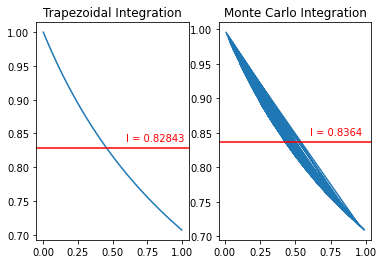

In [131]:
upper_bound = 1
lower_bound = 0
number_of_points = 100


a = trapezoidal_integration(f, lower_bound, upper_bound, number_of_points)
b = monte_carlo_integration(f, lower_bound, upper_bound, number_of_points)

two_subplots(*(a+b))

# Uppgift 2

In [203]:
def s_i(T,volatility,s,N):
    return s*np.exp(-(T/2)*volatility**2 + volatility*np.random.normal(0,T,N))

def max_vector_sum(S_I,K):
    sum = 0
    for i in range(len(S_I)):
        sum += max(S_I[i] - K,0)
    return sum

def BS_solver(T,volatility,K,s,N):
    S_I = s_i(T,volatility,s,N)
    return max_vector_sum(S_I,K)/N

In [205]:
fixed_time = 1                  #t
volatility = 0.2                #sigma
fixed_price = 1.22              #K  
current_price = fixed_price     #s

a = BS_solver(fixed_time,volatility,fixed_price,current_price,100000)
print(a)

0.09683986101578877


# Uppgift 3

In [134]:
def s_i(T,std_dev,s,N):
    S = np.zeros((len(s),N))
    for i in range(len(s)):
        S[i,:] = s[i]*np.exp((-T/2)*std_dev**2 + std_dev*np.random.normal(0,std_dev,N))
    return S

def vector_max(S):
    return np.max(S, axis=0) 

def max_vector_sum(S_I,K):
    sum = 0
    for i in range(len(S_I)):
        sum += max(S_I[i] - K,0)
    return sum

def BS_rainbow(T,std_dev,K,s_0,N):
    S_T = s_i(T,std_dev,s_0,N)
    S_T_max = vector_max(S_T)
    return max_vector_sum(S_T_max,K)/(N**len(s_0))


In [135]:
fixed_time = 1                  #T
fixed_price = 1.22              #k
volatility  = 0.2               #sigma
current_price = [1,4]           #s_0
numer_of_iterations = 1000      #N

a = BS_rainbow(fixed_time,volatility,fixed_price,current_price,numer_of_iterations)
print(a)

0.002700113344820529


# Uppgift 4


**black-schouls med nollränta fås av**

### $\frac{\partial f(s,t)}{\partial t} + \frac{\sigma^2 s^2}{2} \frac{\partial^2 f(s,t)}{\partial t^2} = 0$

**då $(s,t) = (m\Delta s,n\Delta t)$ får vi vidare med finit differensmetod**

### $\frac{\partial f(m\Delta s, n\Delta t)}{\partial \Delta t} + \frac{(\sigma {m \Delta s})^2}{2} \frac{\partial^2 f(m\Delta s, n\Delta t)}{\partial \Delta t^2}$

**För mindre värden på $\Delta s, \Delta t$ kan vi skriva**

### $\frac{\partial f(m\Delta s, n\Delta t)}{\partial \Delta t} \approx \frac{f(m\Delta s, n\Delta t + \Delta t ) - f(m\Delta s, n\Delta t )}{\Delta t}  \approx \frac{f(m\Delta s, n\Delta t ) - f(m\Delta s, n\Delta t - \Delta t)}{\Delta t} = \frac{f(m\Delta s, n\Delta t ) - f(m\Delta s, (n - 1) \Delta t)}{\Delta t}$

### $\frac{\partial f^2(m\Delta s, n\Delta t)}{\partial \Delta s^2} \approx \frac{f(m\Delta s + \Delta s, n\Delta t) - 2f(m\Delta s, n\Delta t) - f(m\Delta s - \Delta s, n\Delta t)}{\Delta t} = \frac{f((m + 1)\Delta s , n\Delta t) - 2f(m\Delta s, n\Delta t) - f((m - 1)\Delta s, n\Delta t)}{\Delta t}$

**Med felen** 

$e_{\Delta s} = c_{\Delta s} \Delta s ^2$ 

$e_{\Delta t} = c_{\Delta t} \Delta t ^2$

**Om vi fixar $\Delta S$ samt $\Delta t$ fås:**

$\tilde{f}(m,n) := f(m\Delta s,n\Delta t)$

**Insättning i Black-Schoels med nollränta ger:**

### $\frac{\tilde{f}(m, n ) - \tilde{f}(m, n - 1)}{\Delta t}  + \frac{(\sigma {m \Delta s})^2}{2} \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 } = 0 $


### $\{ m\Delta s = s \}$,$\quad \{ \alpha = \frac{(\sigma {s})^2}{2} \}$

### $\implies \frac{\tilde{f}(m, n ) - \tilde{f}(m, n - 1)}{\Delta t}  + \alpha \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 } = 0$

# Uppgift 5

**Vi skriver om:**

 ### $\frac{\tilde{f}(m, n ) - \tilde{f}(m, n - 1)}{\Delta t}  + \alpha \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 } = 0 $
 ### $\implies \tilde{f}(m, n - 1 ) =  \tilde{f}(m, n)  +  \Delta t \alpha \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 }$

**Eftersom vi har att:**

$\tilde{f}(m,N) = max(K - m\Delta s,o) $

$n \in \{[0, N] \cap \mathbf{N}\}$

$s_1 \le m \Delta s \le s_2$

**Vi noterar vi att vi har värmeekvationen vilken ger stabilitet då:**

### $\frac{\alpha \Delta t}{\Delta s^2} = \frac{(\sigma {s})^2}{2} \frac{ \Delta t}{\Delta s^2}   \le \frac{1}{2} \implies \Delta t \le  (\frac{\Delta s}{\sigma s})^2 $

### $\Delta s = \frac{s}{m} = \frac{s_2}{m_{total}}$

### $\implies \Delta t \le \frac{1}{(m_{total}\sigma)^2} $

**Med randvärdena:**

**$f(0,t) = k$**

**$f(\alpha K, t) = 0$**

**Kan vi bestämma $f(s_1,t)$ och $f(s_2,t)$,   $\forall t \in \{[0, T] \cap \mathbf{N}\}$ genom att iterera över tid baklänges samt över alla $s_1 \le s \le s_2$**

In [14]:
def get_initial_values(K,m_tot,ds):
    inital_value = np.empty(m_tot+2)
    inital_value[0] = 0
    inital_value[-1] = 0
    for i in range(1,m_tot+1):
        inital_value[i] = max(K-ds*i,0)
    return inital_value

def BS_difference_method_solver(T,s_2,K,sigma,m_tot,ds,dt):
    solution = np.zeros((m_tot+2,T))
    initial_values = get_initial_values(K,m_tot,ds)
    top_boundary_values = np.zeros(T)
    top_boundary_values.fill(K)
    bottom_boundary_values = np.zeros(T)
    bottom_boundary_values.fill(0)
    
    solution[:,-1] = initial_values
    solution[-1,:] = bottom_boundary_values
    solution[0,:] = top_boundary_values
    for t in range(T-1,0,-1):
        for s in range(1 ,m_tot+1):
            solution[s,t-1] = solution[s,t] + ((s/ds)*sigma**2)/2*(solution[s+1,t] - 2*solution[s,t] + solution[s-1,t])

    return solution

In [15]:
price_steps = 10                            #m_tot
fixed_price = 1                             #k
upper_price_limit = 1.5*fixed_price         #s_2
fixed_time = 5                              #T
volatility  = 0.2                           #sigma
delta_s = upper_price_limit/price_steps     #ds
delta_t =  (1/(price_steps*volatility))**2   #dt

solution = BS_difference_method_solver(fixed_time,upper_price_limit,fixed_price,volatility,price_steps,delta_s,delta_t)
print(solution)

[[ 1.          1.          1.          1.          1.        ]
 [ 0.85        0.85        0.85        0.85        0.85      ]
 [ 0.7         0.7         0.7         0.7         0.7       ]
 [ 0.55568889  0.55        0.55        0.55        0.55      ]
 [ 0.42654815  0.41422222  0.4         0.4         0.4       ]
 [ 0.27346667  0.30155556  0.27666667  0.25        0.25      ]
 [ 0.33537778  0.14675556  0.19066667  0.14        0.1       ]
 [-0.11614815  0.22773333  0.04977778  0.09333333  0.        ]
 [ 0.43804444 -0.05973333  0.09955556  0.          0.        ]
 [-0.23893333  0.11946667  0.          0.          0.        ]
 [ 0.15928889  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [258]:
#plot that plots one line for each row in the solution matrix
def plot_solution(solution):
    for i in range(len(solution)):
        plt.plot(solution[i,:])
    plt.show()

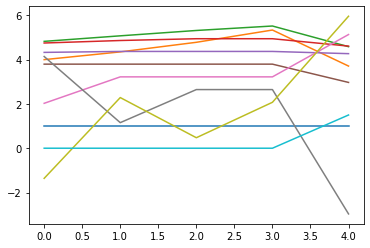

In [260]:
plot_solution(solution)

In [7]:
ar = np.linspace(0,1,5)
print(ar)
maxar = np.max(ar,0.5)
print(maxar)

[0.   0.25 0.5  0.75 1.  ]


TypeError: 'float' object cannot be interpreted as an integer